In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from yellowbrick.regressor import ResidualsPlot, PredictionError

c:\work\py3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Dataset 1: takehome_user_engagement.csv

In [163]:
df = pd.read_csv('takehome_user_engagement.csv')
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [150]:
# df.user_id = df.user_id.astype('str')
# df.user_id.describe()

In [164]:
df['time_stamp'] = pd.DatetimeIndex(df['time_stamp'])
dft= df.set_index(pd.to_datetime(df['time_stamp'], unit='s'))[['user_id','visited']]

In [165]:
df[(df.time_stamp>='2012-06-03') &(df.user_id==50)]

,time_stamp,user_id,visited
705,2012-06-05 11:02:08,50,1
706,2012-06-23 11:02:08,50,1
707,2012-07-07 11:02:08,50,1
708,2012-07-14 11:02:08,50,1
709,2012-07-15 11:02:08,50,1
710,2012-07-24 11:02:08,50,1
711,2012-08-15 11:02:08,50,1
712,2012-08-18 11:02:08,50,1
713,2012-08-22 11:02:08,50,1
714,2012-08-25 11:02:08,50,1


In [166]:
grouper = dft.groupby([pd.Grouper(freq='1w'),'user_id'])
dft_d = grouper['visited'].count().reset_index()
dft_d['adopted_user'] = dft_d['visited'].apply(lambda x: 1 if x>=3 else 0)
dft_d[(dft_d.time_stamp>='2012-06-03') &(dft_d.user_id==50)]

,time_stamp,user_id,visited,adopted_user
31,2012-06-10,50,1,0
180,2012-06-24,50,1,0
371,2012-07-08,50,1,0
472,2012-07-15,50,2,0
703,2012-07-29,50,1,0
1131,2012-08-19,50,2,0
1290,2012-08-26,50,2,0
1645,2012-09-09,50,1,0
1840,2012-09-16,50,1,0
2058,2012-09-23,50,2,0


In [122]:
p=dft_d.groupby(['user_id']).adopted_user.sum().reset_index()
p['adopted_user']=p['adopted_user'].apply(lambda x: 1 if x>=1 else 0)
p.head()

,user_id,adopted_user
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [123]:
#len(p)

8823

## Dataset 2: takehome_users.csv

In [136]:
df0 = pd.read_csv('takehome_users.csv',encoding='cp1252')
df0.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [135]:
# df0.object_id= df0.object_id.astype('str')
# df0.object_id.describe()

count     12000
unique    12000
top        7169
freq          1
Name: object_id, dtype: object

## Merge two datasets

In [141]:
df0 = df0.rename({'object_id':'user_id'}, axis=1)

In [168]:
df = p.merge(df0,how='inner', on='user_id')
df.head()

,user_id,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0,2014-04-22 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,0,2013-11-15 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,0,2013-03-19 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,0,2013-05-21 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,0,2013-01-17 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [181]:
df['dayofyear'] =pd.DatetimeIndex(df['creation_time']).dayofyear
df.user_id = df.user_id.astype('str')

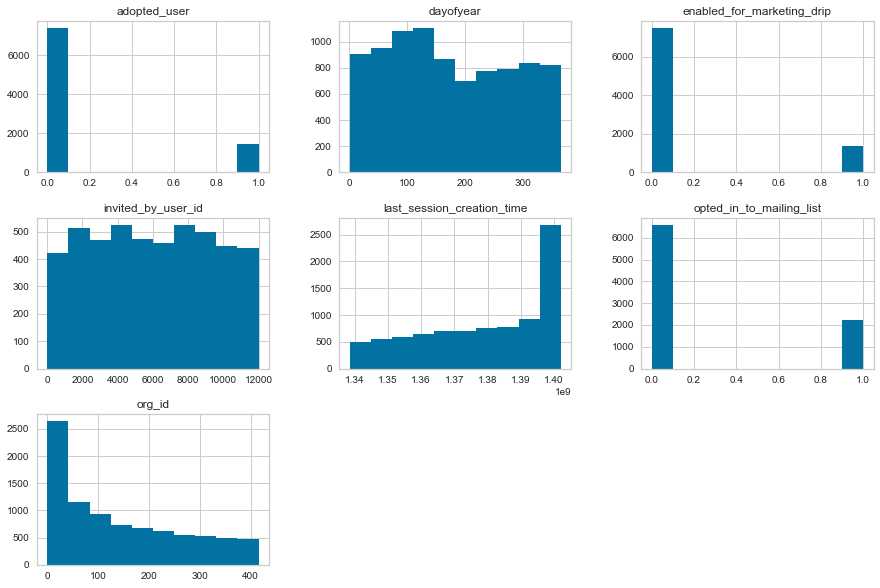

In [182]:
_=df.hist(figsize=(15,10))

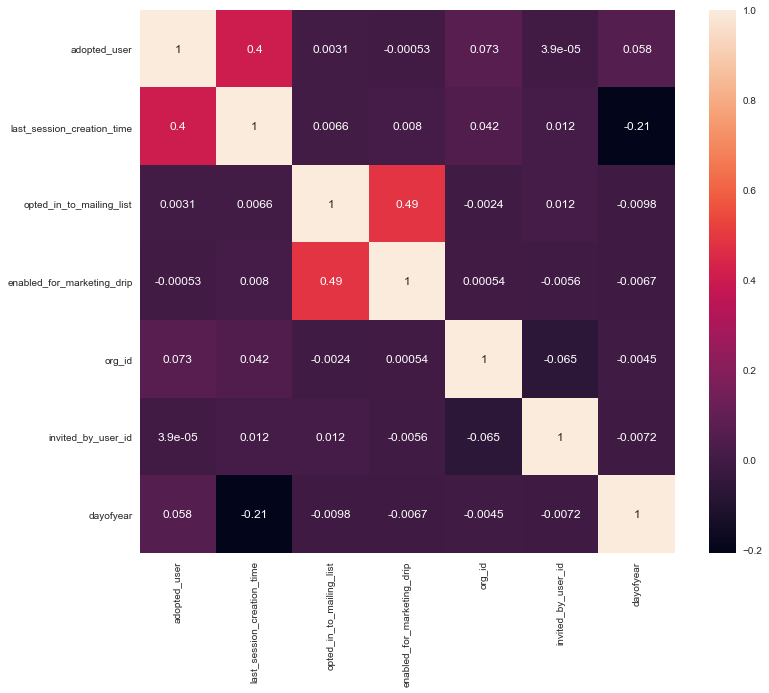

In [183]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True)

* According to the correlation matrix, the time of last login will affect to predcit the future adopted users. 